In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/website_wata.csv')
df.shape

(2000, 7)

In [ ]:
df.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


In [ ]:
df.columns

Index(['Page Views', 'Session Duration', 'Bounce Rate', 'Traffic Source',
       'Time on Page', 'Previous Visits', 'Conversion Rate'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()
df.columns

Index(['Page Views', 'Session Duration', 'Bounce Rate', 'Traffic Source',
       'Time on Page', 'Previous Visits', 'Conversion Rate'],
      dtype='object')

In [ ]:
pd.isnull(df).sum()

,0
Page Views,0
Session Duration,0
Bounce Rate,0
Traffic Source,0
Time on Page,0
Previous Visits,0
Conversion Rate,0


In [ ]:
df.dropna(inplace=True)
df.shape

(2000, 7)

In [ ]:
df.dtypes

,0
Page Views,int64
Session Duration,float64
Bounce Rate,float64
Traffic Source,object
Time on Page,float64
Previous Visits,int64
Conversion Rate,float64


In [ ]:
numeric_cols = ["Page Views", "Session Duration", "Bounce Rate",
                "Time on Page", "Previous Visits", "Conversion Rate"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.dtypes

,0
Page Views,int64
Session Duration,float64
Bounce Rate,float64
Traffic Source,object
Time on Page,float64
Previous Visits,int64
Conversion Rate,float64


In [ ]:
df.dropna(inplace=True)
df.shape

(2000, 7)

In [ ]:
df.describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


In [ ]:
df[["Page Views", "Session Duration", "Bounce Rate", "Time on Page", "Previous Visits"]].describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500
std,2.183903,3.104518,0.159781,2.887422,1.432852
min,0.000000,0.003613,0.007868,0.068515,0.000000
25%,3.000000,0.815828,0.161986,1.935037,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000


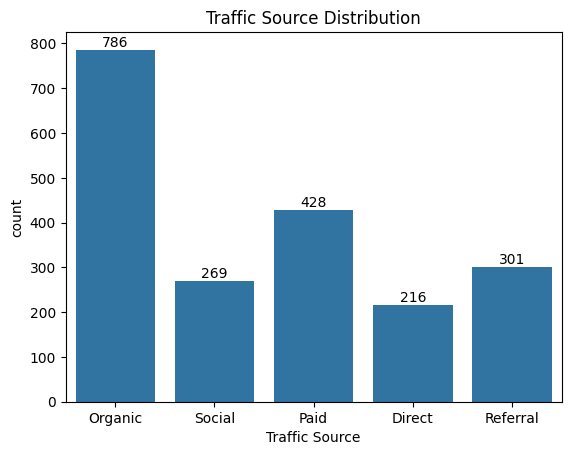

In [ ]:
ax = sns.countplot(x='Traffic Source', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Traffic Source Distribution")
plt.show()

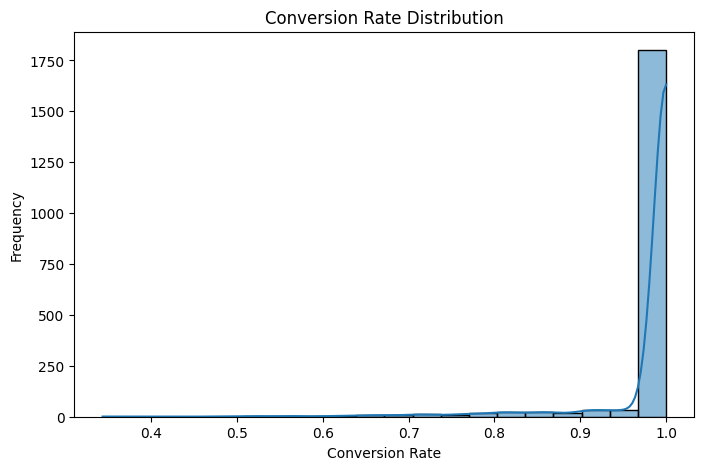

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Conversion Rate"], bins=20, kde=True)
plt.title("Conversion Rate Distribution")
plt.xlabel("Conversion Rate")
plt.ylabel("Frequency")
plt.show()

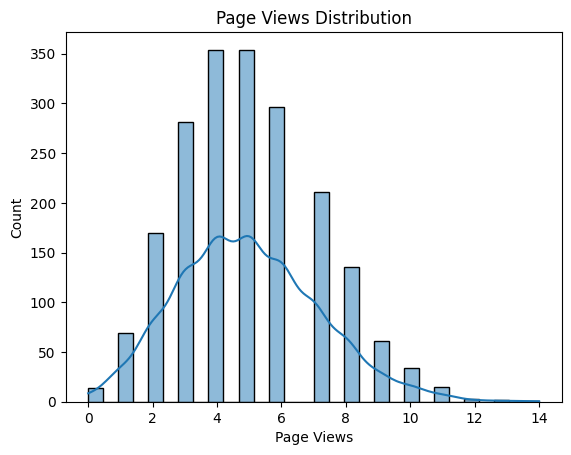

In [ ]:
sns.histplot(df["Page Views"], kde=True)
plt.title("Page Views Distribution")
plt.show()

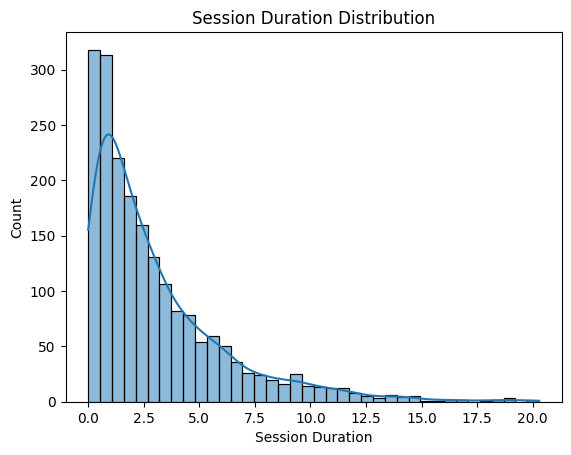

In [ ]:
sns.histplot(df["Session Duration"], kde=True)
plt.title("Session Duration Distribution")
plt.show()

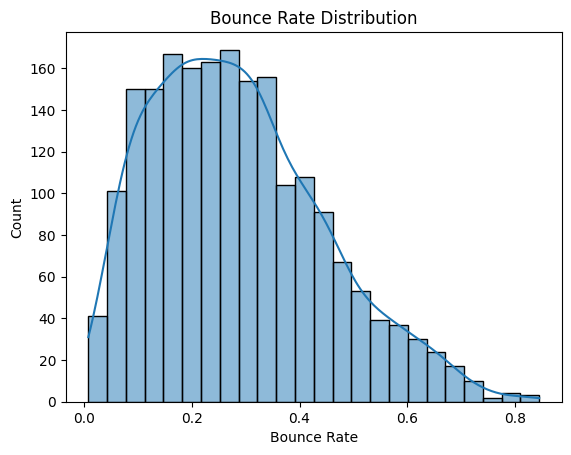

In [ ]:
sns.histplot(df["Bounce Rate"], kde=True)
plt.title("Bounce Rate Distribution")
plt.show()

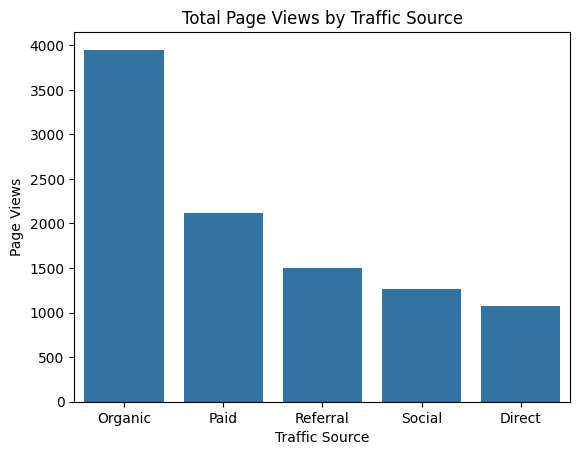

In [ ]:
traffic_pageviews = df.groupby(['Traffic Source'], as_index=False)['Page Views'].sum().sort_values(by='Page Views', ascending=False)

sns.barplot(x='Traffic Source', y='Page Views', data=traffic_pageviews)
plt.title("Total Page Views by Traffic Source")
plt.show()

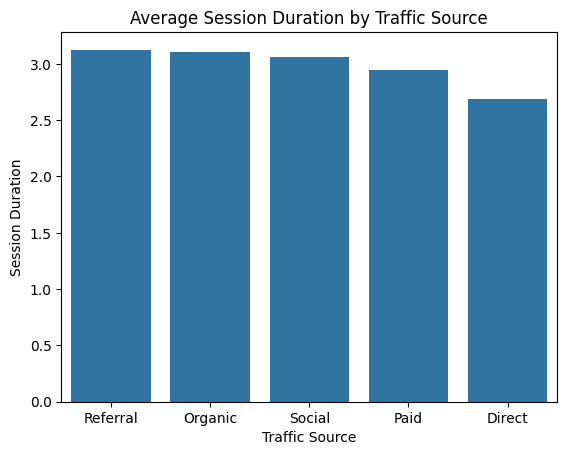

In [ ]:
traffic_session = df.groupby(['Traffic Source'], as_index=False)['Session Duration'].mean().sort_values(by='Session Duration', ascending=False)

sns.barplot(x='Traffic Source', y='Session Duration', data=traffic_session)
plt.title("Average Session Duration by Traffic Source")
plt.show()

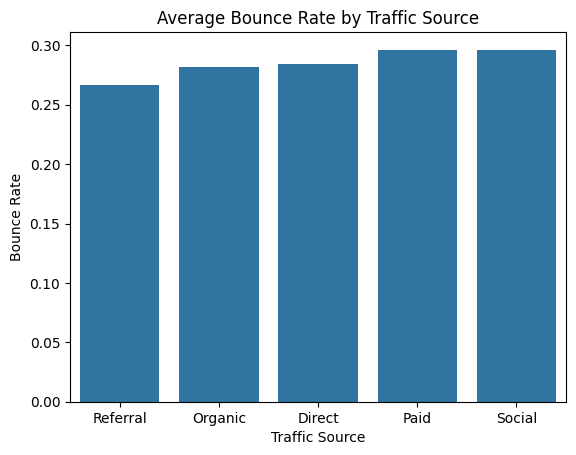

In [ ]:
traffic_bounce = df.groupby(['Traffic Source'], as_index=False)['Bounce Rate'].mean().sort_values(by='Bounce Rate', ascending=True)

sns.barplot(x='Traffic Source', y='Bounce Rate', data=traffic_bounce)
plt.title("Average Bounce Rate by Traffic Source")
plt.show()

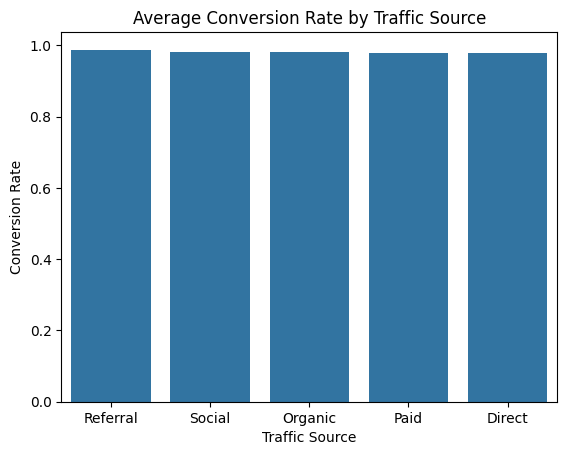

In [ ]:
traffic_conversion = df.groupby(['Traffic Source'], as_index=False)['Conversion Rate'].mean().sort_values(by='Conversion Rate', ascending=False)

sns.barplot(x='Traffic Source', y='Conversion Rate', data=traffic_conversion)
plt.title("Average Conversion Rate by Traffic Source")
plt.show()

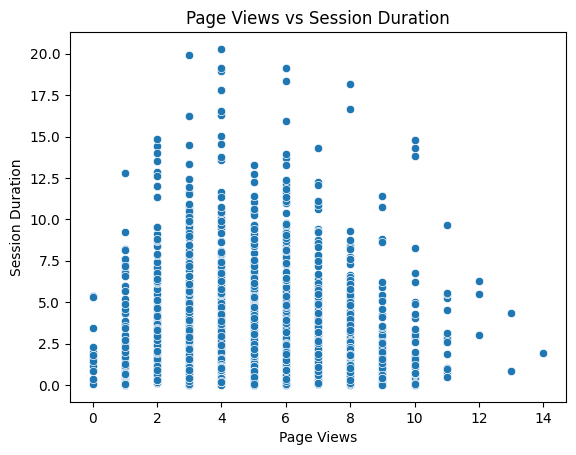

In [ ]:
sns.scatterplot(x="Page Views", y="Session Duration", data=df)
plt.title("Page Views vs Session Duration")
plt.show()

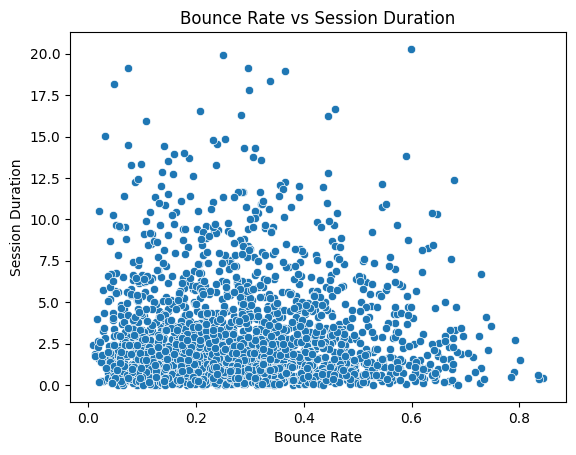

In [ ]:
sns.scatterplot(x="Bounce Rate", y="Session Duration", data=df)
plt.title("Bounce Rate vs Session Duration")
plt.show()

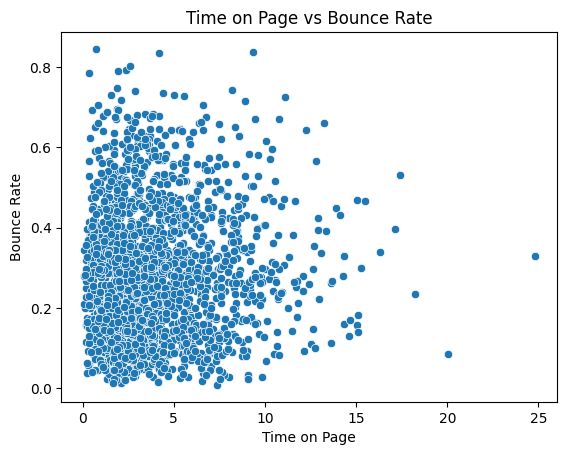

In [ ]:
sns.scatterplot(x="Time on Page", y="Bounce Rate", data=df)
plt.title("Time on Page vs Bounce Rate")
plt.show()

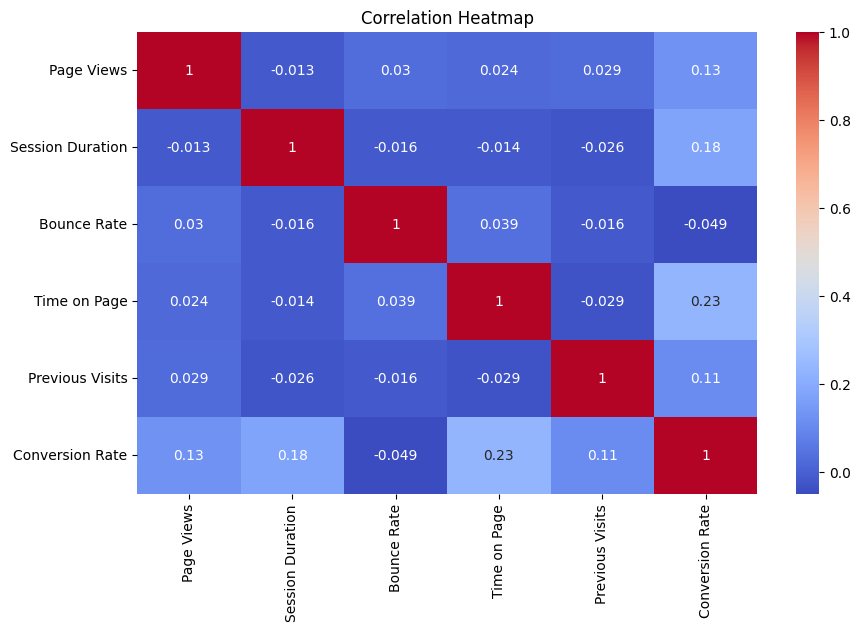

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

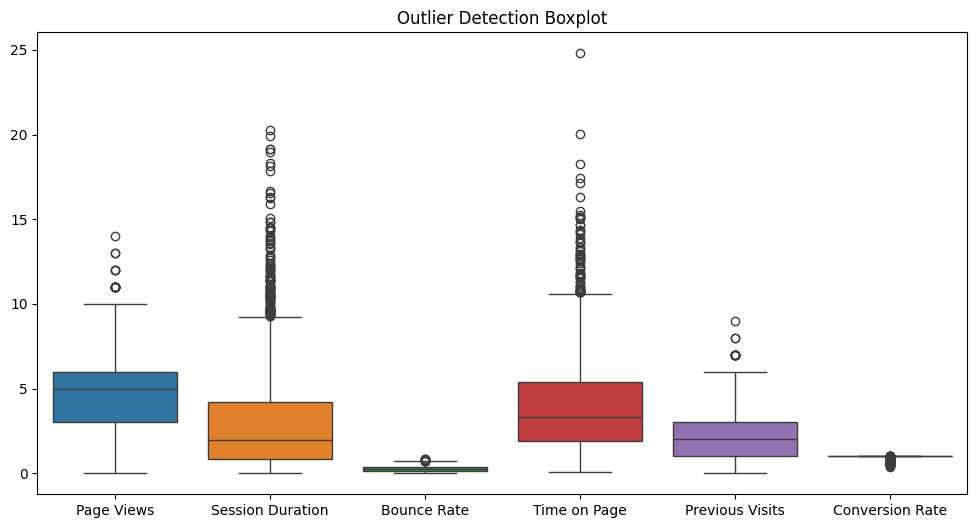

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Outlier Detection Boxplot")
plt.show()

In [ ]:
df.sort_values("Page Views", ascending=False).head(10)

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
1502,14,1.907083,0.300452,Organic,6.343242,3,1.0
1760,13,0.861771,0.371030,Organic,4.378442,1,1.0
1791,13,4.319331,0.350651,Organic,2.757196,0,1.0
468,12,5.514459,0.279516,Direct,12.083495,2,1.0
1412,12,3.034643,0.421693,Organic,4.644507,5,1.0
1956,12,6.259658,0.044933,Paid,1.701090,1,1.0
621,11,3.133805,0.079137,Organic,1.389462,4,1.0
960,11,9.644907,0.132499,Organic,3.707890,2,1.0
1536,11,4.522619,0.489625,Organic,3.740791,4,1.0
20,11,0.787760,0.251641,Organic,11.692938,5,1.0


In [ ]:
best_source = df.groupby("Traffic Source")["Conversion Rate"].mean().idxmax()
print("Best Traffic Source (Highest Conversion Rate):", best_source)

Best Traffic Source (Highest Conversion Rate): Referral
